In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import datetime
import plotly.express as px
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [53]:
#Reading the file and saving it in a pandas dataframe
SuperstoreSales = pd.read_csv('SuperstoreSalesUK.csv', encoding= 'unicode_escape', parse_dates=True)
SuperstoreSales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,1,ES-2013-2860574,27/02/2013,01/03/2013,Second Class,LB-16795,Laurel Beltran,Home Office,Edinburgh,Scotland,...,OFF-AP-10003590,Office Supplies,Appliances,"KitchenAid Refrigerator, Black",5273.700,10,0.0,1898.400,730.91,High
1,2,ES-2014-2637201,14/01/2014,18/01/2014,Standard Class,PO-18865,Patrick O'Donnell,Consumer,Stockton-on-Tees,England,...,TEC-CO-10000013,Technology,Copiers,"Brother Fax Machine, Laser",4141.020,13,0.0,1697.670,668.96,High
2,3,ES-2012-5877219,13/12/2012,17/12/2012,Standard Class,GT-14710,Greg Tran,Consumer,Huddersfield,England,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",5785.020,9,0.0,404.730,656.73,High
3,4,ES-2012-2058076,20/09/2012,22/09/2012,Second Class,AB-10150,Aimee Bixby,Consumer,London,England,...,TEC-PH-10004505,Technology,Phones,"Nokia Smart Phone, Full Size",3441.690,6,0.1,38.070,585.25,High
4,5,ES-2011-2257437,10/08/2011,17/08/2011,Standard Class,BP-11155,Becky Pak,Consumer,London,England,...,TEC-PH-10002759,Technology,Phones,"Cisco Smart Phone, Cordless",5276.988,9,0.1,1758.888,454.81,Medium


In [79]:
#check for missing values

print(SuperstoreSales.isna().any())
# We observe null values in the Postal Code field of the data. Let's evaluate the number of null values in this field.

print(SuperstoreSales.isna().sum())

# Counting the number of null values, we see all the orders have null values for Postal Code. 
# This field is not very important for our analysis, deleting this column along with the row ID, Market and Region
del SuperstoreSales['Row ID']
del SuperstoreSales['Postal Code']
del SuperstoreSales['Market']
del SuperstoreSales['Region']

SuperstoreSales.info()

Row ID            False
Order ID          False
Order Date        False
Ship Date         False
Ship Mode         False
Customer ID       False
Customer Name     False
Segment           False
City              False
State             False
Country           False
Postal Code        True
Market            False
Region            False
Product ID        False
Category          False
Sub-Category      False
Product Name      False
Sales             False
Quantity          False
Discount          False
Profit            False
Shipping Cost     False
Order Priority    False
Year              False
dtype: bool
Row ID               0
Order ID             0
Order Date           0
Ship Date            0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
City                 0
State                0
Country              0
Postal Code       1633
Market               0
Region               0
Product ID           0
Category             0
Sub-Category        

In [68]:
#correcting date format

SuperstoreSales['Order Date'] = pd.to_datetime(SuperstoreSales['Order Date'], errors ='coerce', dayfirst=True)
SuperstoreSales['Ship Date'] = pd.to_datetime(SuperstoreSales['Ship Date'], errors ='coerce', dayfirst=True)
format = "%Y/%m/%d"
SuperstoreSales.info()
SuperstoreSales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          1633 non-null   int64         
 1   Order ID        1633 non-null   object        
 2   Order Date      1633 non-null   datetime64[ns]
 3   Ship Date       1633 non-null   datetime64[ns]
 4   Ship Mode       1633 non-null   object        
 5   Customer ID     1633 non-null   object        
 6   Customer Name   1633 non-null   object        
 7   Segment         1633 non-null   object        
 8   City            1633 non-null   object        
 9   State           1633 non-null   object        
 10  Country         1633 non-null   object        
 11  Postal Code     0 non-null      float64       
 12  Market          1633 non-null   object        
 13  Region          1633 non-null   object        
 14  Product ID      1633 non-null   object        
 15  Cate

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
0,1,ES-2013-2860574,2013-02-27,2013-03-01,Second Class,LB-16795,Laurel Beltran,Home Office,Edinburgh,Scotland,...,Office Supplies,Appliances,"KitchenAid Refrigerator, Black",5273.700,10,0.0,1898.400,730.91,High,2013
1,2,ES-2014-2637201,2014-01-14,2014-01-18,Standard Class,PO-18865,Patrick O'Donnell,Consumer,Stockton-on-Tees,England,...,Technology,Copiers,"Brother Fax Machine, Laser",4141.020,13,0.0,1697.670,668.96,High,2014
2,3,ES-2012-5877219,2012-12-13,2012-12-17,Standard Class,GT-14710,Greg Tran,Consumer,Huddersfield,England,...,Technology,Phones,"Motorola Smart Phone, Cordless",5785.020,9,0.0,404.730,656.73,High,2012
3,4,ES-2012-2058076,2012-09-20,2012-09-22,Second Class,AB-10150,Aimee Bixby,Consumer,London,England,...,Technology,Phones,"Nokia Smart Phone, Full Size",3441.690,6,0.1,38.070,585.25,High,2012
4,5,ES-2011-2257437,2011-08-10,2011-08-17,Standard Class,BP-11155,Becky Pak,Consumer,London,England,...,Technology,Phones,"Cisco Smart Phone, Cordless",5276.988,9,0.1,1758.888,454.81,Medium,2011


In [69]:
#Finding unique instances of all fields
SuperstoreSales.nunique()

Row ID            1633
Order ID           775
Order Date         604
Ship Date          615
Ship Mode            4
Customer ID        529
Customer Name      529
Segment              3
City               164
State                3
Country              1
Postal Code          0
Market               1
Region               1
Product ID        1010
Category             3
Sub-Category        17
Product Name       997
Sales             1455
Quantity            14
Discount             6
Profit            1272
Shipping Cost     1334
Order Priority       4
Year                 4
dtype: int64

In [70]:
# Dataframe at a glance. 
SuperstoreSales.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,1633.00000,0.0,1633.000000,1633.000000,1633.000000,1633.00000,1633.000000
mean,817.00000,NaN,323.684201,3.772811,0.065707,68.52428,32.810945
std,471.55081,NaN,566.326238,2.177862,0.144803,188.60708,61.235127
min,1.00000,NaN,4.500000,1.000000,0.000000,-686.97000,0.030000
25%,409.00000,NaN,48.000000,2.000000,0.000000,4.89600,4.180000
50%,817.00000,NaN,122.031000,3.000000,0.000000,19.14000,11.340000
75%,1225.00000,NaN,342.720000,5.000000,0.100000,65.88000,33.670000
max,1633.00000,NaN,5785.020000,14.000000,0.800000,2461.32000,730.910000


In [71]:
# Store's performance in terms of total sales, quantity and profit

print("The total sales recorded is :",round(sum(SuperstoreSales['Sales']), 0))
print("The total quantity sold is is :",round(sum(SuperstoreSales['Quantity']), 0))
print("The total profit made by the store is :",round(sum(SuperstoreSales['Profit']), 0))

The total sales recorded is : 528576.0
The total quantity sold is is : 6161
The total profit made by the store is : 111900.0


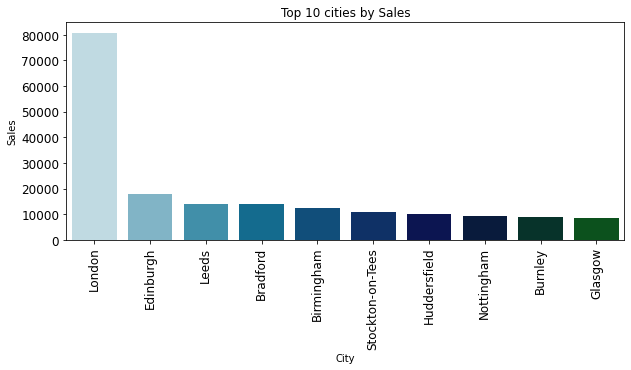

In [72]:
#Top 10 cities by Sale
# sorting city- wise aggregated sum of sales.

df_SaleTop10=SuperstoreSales.groupby('City')['Sales'].sum().reset_index()
df_SaleTop10sorted = df_SaleTop10.sort_values('Sales',ascending=False).head(10)
df_SaleTop10sorted

#Plotting the data
sns.barplot(x='City', y='Sales', data=df_SaleTop10sorted, palette='ocean_r')
plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Top 10 cities by Sales');

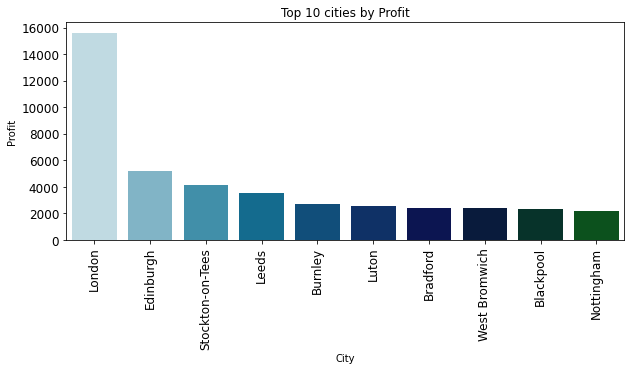

In [73]:
#Top 10 cities by Profit
# sorting city- wise aggregated sum of profit.

df_ProfitTop10=SuperstoreSales.groupby('City')['Profit'].sum().reset_index()
df_ProfitTop10sorted = df_ProfitTop10.sort_values('Profit',ascending=False).head(10)
df_ProfitTop10sorted

#Plotting the data
sns.barplot(x='City', y='Profit', data=df_ProfitTop10sorted, palette='ocean_r')
plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Top 10 cities by Profit');

In [74]:
SuperstoreSales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
0,1,ES-2013-2860574,2013-02-27,2013-03-01,Second Class,LB-16795,Laurel Beltran,Home Office,Edinburgh,Scotland,...,Office Supplies,Appliances,"KitchenAid Refrigerator, Black",5273.700,10,0.0,1898.400,730.91,High,2013
1,2,ES-2014-2637201,2014-01-14,2014-01-18,Standard Class,PO-18865,Patrick O'Donnell,Consumer,Stockton-on-Tees,England,...,Technology,Copiers,"Brother Fax Machine, Laser",4141.020,13,0.0,1697.670,668.96,High,2014
2,3,ES-2012-5877219,2012-12-13,2012-12-17,Standard Class,GT-14710,Greg Tran,Consumer,Huddersfield,England,...,Technology,Phones,"Motorola Smart Phone, Cordless",5785.020,9,0.0,404.730,656.73,High,2012
3,4,ES-2012-2058076,2012-09-20,2012-09-22,Second Class,AB-10150,Aimee Bixby,Consumer,London,England,...,Technology,Phones,"Nokia Smart Phone, Full Size",3441.690,6,0.1,38.070,585.25,High,2012
4,5,ES-2011-2257437,2011-08-10,2011-08-17,Standard Class,BP-11155,Becky Pak,Consumer,London,England,...,Technology,Phones,"Cisco Smart Phone, Cordless",5276.988,9,0.1,1758.888,454.81,Medium,2011


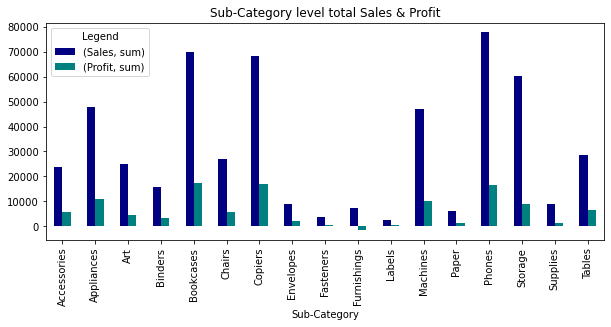

In [157]:
#Sub-category level Sales and profit

colormap = ['navy', 'Teal']
plt.rcParams["figure.figsize"] = (10,4)
fig = SuperstoreSales.groupby('Sub-Category')['Sales','Profit'].agg(['sum']).plot.bar(color=colormap)
plt.title('Sub-Category level total Sales & Profit')
plt.legend(loc=2, title='Legend');

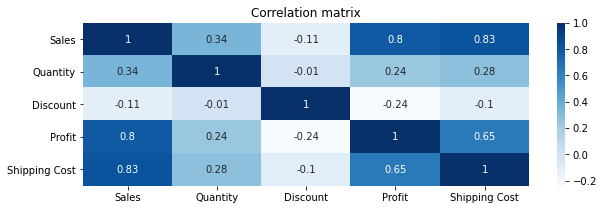

In [158]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(10,3))
# sns.set()
sns.heatmap(np.round(SuperstoreSales.corr(),2),annot=True, cmap='Blues')
plt.yticks(rotation=360)
plt.title('Correlation matrix');

In [159]:
#Summarizing the data yearly
SuperstoreSales['Year'] = SuperstoreSales['Order Date'].apply(lambda x: x.strftime('%Y'))

year =  [*range(2011, 2015, 1)]
dfYear = pd.Series(year)

YoYSale = (SuperstoreSales.groupby(['Year'])['Sales'].sum())
YoYQuantity = round(SuperstoreSales.groupby(['Year'])['Quantity'].sum(),0)
YoYProfit = round(SuperstoreSales.groupby(['Year'])['Profit'].sum(),0)
YoYShippingCost = round(SuperstoreSales.groupby(['Year'])['Shipping Cost'].sum(),0)
YoYOrders = round(SuperstoreSales.groupby(['Year'])['Order ID'].nunique(),0)
YoYCustomers = round(SuperstoreSales.groupby(['Year'])['Customer ID'].nunique(),0)
YoYDiscount = round(SuperstoreSales.groupby(['Year'])['Discount'].mean(),4)

YoY = pd.concat([YoYSale, YoYQuantity, YoYProfit, YoYShippingCost,YoYOrders,YoYCustomers,YoYDiscount], axis=1).reset_index()
# YoY.set_index('Year')
YoY

,Year,Sales,Quantity,Profit,Shipping Cost,Order ID,Customer ID,Discount
0,2011,86188.551,878,20080.0,8950.0,130,129,0.0640
1,2012,124335.906,1523,27366.0,11657.0,186,175,0.0712
2,2013,124046.802,1401,27698.0,13019.0,194,176,0.0705
3,2014,194005.041,2359,36756.0,19955.0,265,255,0.0599


In [164]:
YoYGrowth = YoY.copy()
YoYGrowth['No._of Orders'] = YoY['Order ID']
YoYGrowth['No._of Customers'] = YoY['Customer ID']
pct = YoYGrowth[['Sales','Quantity', 'Profit', 'Shipping Cost', 'No._of Orders', 'No._of Customers']].astype(float).pct_change()
pct['Year'] = YoY['Year']
YoYGrowth2 = pct.set_index('Year')
YoYGrowth2.style.format("{:.2%}")

,Sales,Quantity,Profit,Shipping Cost,No._of Orders,No._of Customers
Year,,,,,,
2011,nan%,nan%,nan%,nan%,nan%,nan%
2012,44.26%,73.46%,36.28%,30.25%,43.08%,35.66%
2013,-0.23%,-8.01%,1.21%,11.68%,4.30%,0.57%
2014,56.40%,68.38%,32.70%,53.28%,36.60%,44.89%


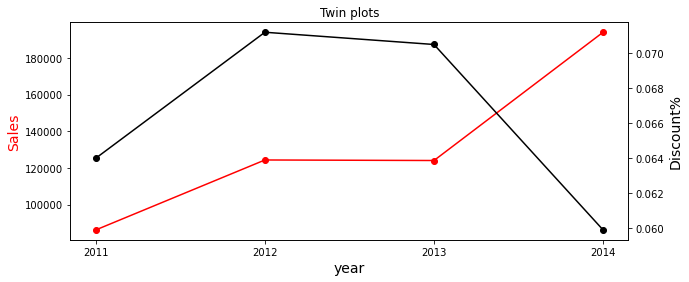

In [160]:
#Analysing yearly Sales behaviour with discount

fig,ax = plt.subplots()
ax.plot(YoY.Year, YoY.Sales, color="red", marker="o")
ax.set_title("Twin plots")
ax.set_xlabel("year",fontsize=14)
ax.set_ylabel("Sales",color="red",fontsize=14)

ax2=ax.twinx()
# twinx() to help us make a plot with two different y axis
ax2.plot(YoY['Year'], YoY['Discount'], color="black",marker="o")
ax2.set_ylabel("Discount%",color="black",fontsize=14)
plt.show()

In [161]:
# Multilevel hierarchical Sales Composition

fig = px.sunburst(SuperstoreSales,path=['Country','Segment','Category', 'Sub-Category'], values='Sales', color='Sales', color_continuous_scale='blues')
fig.update_traces(insidetextorientation='radial')
fig.show()

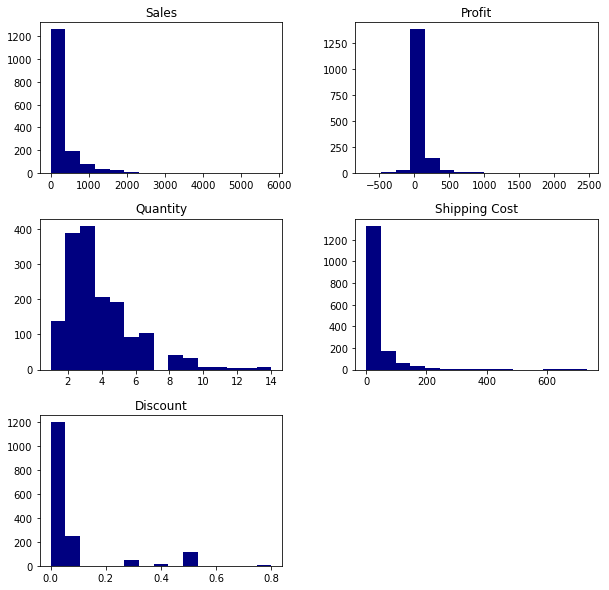

In [102]:
#Analysing the numerical distribution

numeric_fields = ['Sales', 'Profit', 'Quantity', 'Shipping Cost', 'Discount']
ax_list= SuperstoreSales[numeric_fields].hist(bins=15,figsize=(10, 10), layout=(3, 2), grid=False, color="navy")


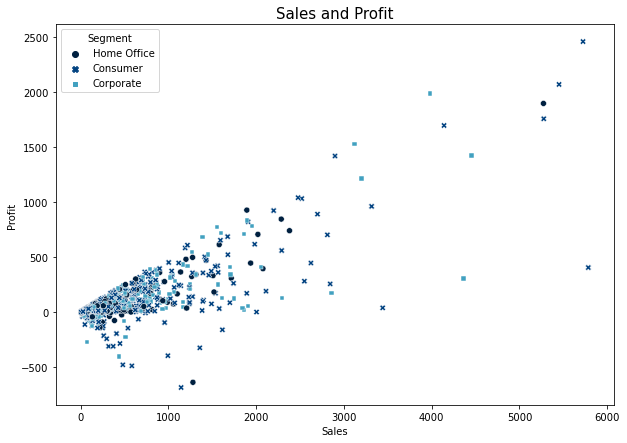

In [18]:
# Segment wise Sales - Profit mix.

plt.rcParams["figure.figsize"] = (10,7)
sns.scatterplot(x='Sales', y='Profit', data = SuperstoreSales, hue='Segment', style='Segment', palette='ocean')
plt.title('Sales and Profit', fontsize = 15)
ax.set_xlabel('Sales')
ax.set_ylabel('Profit');

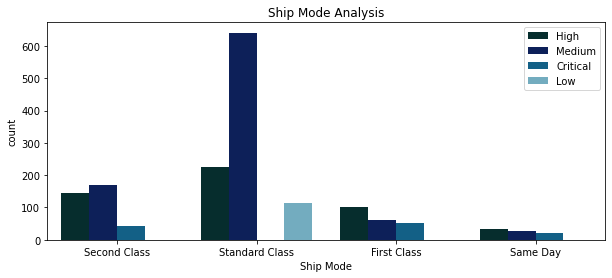

In [57]:
# Analysing ship modes with Order Priority  

plt.figure(figsize=(10, 4))
sns.countplot(x=SuperstoreSales['Ship Mode'], hue='Order Priority', data=SuperstoreSales, palette="ocean")
plt.title("Ship Mode Analysis")
plt.xticks(size=10)
plt.legend(loc=1)
sns.color_palette("flare", as_cmap=True);

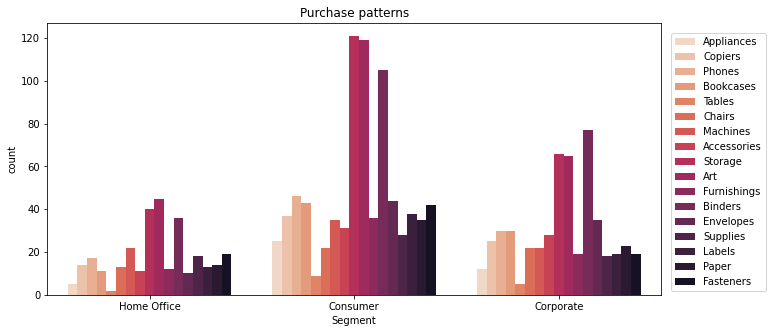

In [91]:
#Purchase patterns

plt.figure(figsize=(11, 5))
sns.countplot(x=SuperstoreSales['Segment'], hue='Sub-Category', data=SuperstoreSales, palette ="rocket_r")
plt.title("Purchase patterns")
plt.xticks(size=10)
plt.legend(bbox_to_anchor=(1, 1),borderaxespad=1);

In [166]:
#Pareto analysis
#Calculate TotalPrice Per Product and sort them by the products with the highest Sales.
SuperstoreSalesProduct = SuperstoreSales.groupby('Product Name').agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)
SuperstoreSalesProduct.reset_index(inplace=True)
SuperstoreSalesProduct.head()

,Product Name,Sales
0,"Nokia Smart Phone, Full Size",16806.690
1,"Cisco Smart Phone, Cordless",7231.428
2,"Chromcraft Conference Table, with Bottom Storage",6981.360
3,"Nokia Smart Phone, Cordless",6743.190
4,"Motorola Smart Phone, Cordless",5785.020


In [167]:
# #Finding the Total Sales 
SuperstoreSalesProduct["Sales"].sum()

528576.3

In [168]:
#Finding the cumulative total of the sorted products 
SuperstoreSalesProduct['SumTotalPrice'] = SuperstoreSalesProduct.Sales.cumsum()
SuperstoreSalesProduct.head()

,Product Name,Sales,SumTotalPrice
0,"Nokia Smart Phone, Full Size",16806.690,16806.690
1,"Cisco Smart Phone, Cordless",7231.428,24038.118
2,"Chromcraft Conference Table, with Bottom Storage",6981.360,31019.478
3,"Nokia Smart Phone, Cordless",6743.190,37762.668
4,"Motorola Smart Phone, Cordless",5785.020,43547.688


In [169]:
#Defining a variable to hold the threshold value. 
threshold = SuperstoreSalesProduct["Sales"].sum() * 0.80

#Using subsetting to find the products that make up 80% of the total Sales and storing it in a ariable
SuperstoreSalesProduct80perc = SuperstoreSalesProduct[SuperstoreSalesProduct['SumTotalPrice'] <= threshold]
SuperstoreSalesProduct80perc

,Product Name,Sales,SumTotalPrice
0,"Nokia Smart Phone, Full Size",16806.690,16806.690
1,"Cisco Smart Phone, Cordless",7231.428,24038.118
2,"Chromcraft Conference Table, with Bottom Storage",6981.360,31019.478
3,"Nokia Smart Phone, Cordless",6743.190,37762.668
4,"Motorola Smart Phone, Cordless",5785.020,43547.688
...,...,...,...
296,"Fiskars Trimmer, Easy Grip",439.200,421024.485
297,"StarTech Phone, White",437.580,421462.065
298,"Tenex Trays, Industrial",437.520,421899.585
299,"Cardinal 3-Hole Punch, Recycled",437.400,422336.985


In [170]:
SuperstoreSalesProduct80perc["Product Name"].nunique()
#All the products in the Dataframe are hence unique

301

In [171]:
# Finding percentage of products contributing to top 80% Sales. We see that a relatively small subset of 30% (although not 20%) 
# of all products contribute to top 80% Sales thereby confirming our analysis.
SuperstoreSalesProduct80perc["Product Name"].nunique()/SuperstoreSalesProduct["Product Name"].nunique()

0.30190571715145437